# Practice 1 : Processing a Collection of Objects

So far, we have seen how to process and analyze a dataset composed of text files with Spark. We will now see through a the next exercises how to use it to process an arbitrary type of file dataset, in this case images.

We will work on the [Oxford Flowers](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) dataset.

In [1]:
! pip install pillow

Looking in links: /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/avx2, /cvmfs/soft.computecanada.ca/custom/python/wheelhouse/generic


In [2]:
import os, glob

In [3]:
PATH = '/project/datasets/flowers/jpg/'

In [4]:
! ls /project/datasets/flowers/jpg/*.jpg

/project/datasets/flowers/jpg/image_0001.jpg
/project/datasets/flowers/jpg/image_0002.jpg
/project/datasets/flowers/jpg/image_0003.jpg
/project/datasets/flowers/jpg/image_0004.jpg
/project/datasets/flowers/jpg/image_0005.jpg
/project/datasets/flowers/jpg/image_0006.jpg
/project/datasets/flowers/jpg/image_0007.jpg
/project/datasets/flowers/jpg/image_0008.jpg
/project/datasets/flowers/jpg/image_0009.jpg
/project/datasets/flowers/jpg/image_0010.jpg
/project/datasets/flowers/jpg/image_0011.jpg
/project/datasets/flowers/jpg/image_0012.jpg
/project/datasets/flowers/jpg/image_0013.jpg
/project/datasets/flowers/jpg/image_0014.jpg
/project/datasets/flowers/jpg/image_0015.jpg
/project/datasets/flowers/jpg/image_0016.jpg
/project/datasets/flowers/jpg/image_0017.jpg
/project/datasets/flowers/jpg/image_0018.jpg
/project/datasets/flowers/jpg/image_0019.jpg
/project/datasets/flowers/jpg/image_0020.jpg
/project/datasets/flowers/jpg/image_0021.jpg
/project/datasets/flowers/jpg/image_0022.jpg
/project/d

In [5]:
image_list = glob.glob(PATH+'*.jpg')
image_list

['/project/datasets/flowers/jpg/image_0064.jpg',
 '/project/datasets/flowers/jpg/image_0716.jpg',
 '/project/datasets/flowers/jpg/image_1172.jpg',
 '/project/datasets/flowers/jpg/image_0914.jpg',
 '/project/datasets/flowers/jpg/image_0963.jpg',
 '/project/datasets/flowers/jpg/image_0115.jpg',
 '/project/datasets/flowers/jpg/image_1257.jpg',
 '/project/datasets/flowers/jpg/image_0564.jpg',
 '/project/datasets/flowers/jpg/image_1337.jpg',
 '/project/datasets/flowers/jpg/image_0006.jpg',
 '/project/datasets/flowers/jpg/image_0008.jpg',
 '/project/datasets/flowers/jpg/image_1050.jpg',
 '/project/datasets/flowers/jpg/image_0703.jpg',
 '/project/datasets/flowers/jpg/image_0004.jpg',
 '/project/datasets/flowers/jpg/image_0806.jpg',
 '/project/datasets/flowers/jpg/image_1342.jpg',
 '/project/datasets/flowers/jpg/image_0212.jpg',
 '/project/datasets/flowers/jpg/image_0166.jpg',
 '/project/datasets/flowers/jpg/image_0548.jpg',
 '/project/datasets/flowers/jpg/image_1118.jpg',
 '/project/datasets/

The Python library [Pillow](https://python-pillow.github.io/) can help us read images. For example:

In [6]:
from PIL import Image

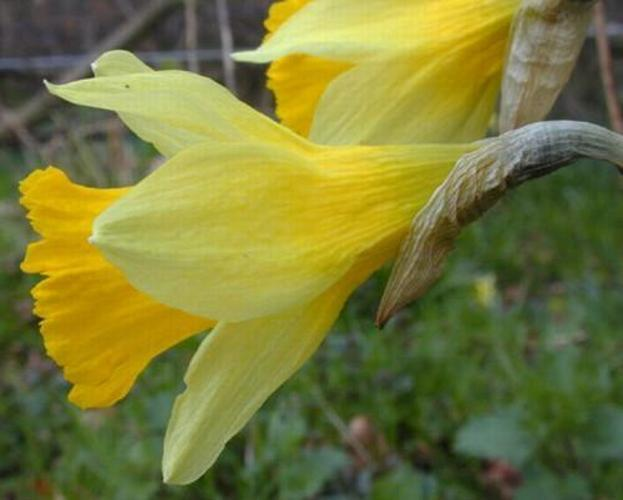

In [7]:
flower_image = Image.open(image_list[0])
flower_image

To reduce the dimensions of an image, we can use the method `resize` which returns a new `PIL.image` object.

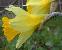

In [8]:
image_resized = flower_image.resize((flower_image.width//10, flower_image.height//10))
image_resized

This image can then be saved on disk using the method `save()`.

## Instructions

### 0. Import the necessary module to process data with Spark and create a Spark context if required

In [9]:
import pyspark

In [10]:
sc = pyspark.SparkContext()

### 1. Create a RDD from the list of filenames `image_list`

In [11]:
all_images = [Image.open(filename) for filename in image_list]

OSError: [Errno 24] Too many open files: '/project/datasets/flowers/jpg/image_0840.jpg'

In [ ]:
all_images = []
for filename in image_list:
    all_image.append(Image.open(filename))

In [12]:
flower_images = sc.parallelize(image_list)

In [13]:
flower_images.first()

'/project/datasets/flowers/jpg/image_0064.jpg'

### 2. Create a second RDD that contains `PIL.Image`

In [14]:
images_rdd = flower_images.map(Image.open)

### 3. Keep only the landscape images (`width > height`)

In [24]:
landscape_img = images_rdd.filter(lambda img: img.width > img.height)

### 4. Count the number of landscape images

In [25]:
landscape_img.count()

794

### 5. Reduce the dimensions of landscape images by a factor 5

In [23]:
dir()

['Image',
 'In',
 'Out',
 'PATH',
 '_',
 '_13',
 '_16',
 '_19',
 '_21',
 '_5',
 '_7',
 '_8',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'example_flower',
 'exit',
 'flower_image',
 'flower_images',
 'get_ipython',
 'glob',
 'image_list',
 'image_resized',
 'images_rdd',
 'landscape_rdd',
 'landscape_thumb',
 'os',
 'pyspark',
 'quit',
 'resize_by_factor',
 'sc']

In [28]:
def resize_by_factor(img, factor):
    return img.resize((int(img.width / factor), int(img.height / factor)))

In [31]:
landscape_thumb = landscape_img.map(lambda img: resize_by_factor(img, 5))

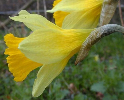

In [32]:
landscape_thumb.first()

### 6. Verify the transformation by retrieving the first element

In [20]:
example_flower = landscape_thumb.first()

In [22]:
example_flower.save('flower_example.jpg')

In [ ]:
landscape_thumb.foreach(lambda img: img.save())

### 7. Save the new images as files

**Watch out**
* How to tell PIL where to save the files?
* How can we specify the name and the paths of our new files?
* Could a dataset of key-value pairs be useful?
* Is this an action or a transformation?

In [34]:
filename_rdd = sc.parallelize(image_list)

In [35]:
image_rdd = filename_rdd.map(lambda filename: (filename.split('/')[-1], Image.open(filename)) )

In [38]:
landscape_rdd = image_rdd.filter(lambda pair: pair[1].width > pair[1].height)

In [39]:
landscape_rdd.count()

794

In [40]:
landscape_rdd.first()

('image_0064.jpg',
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=623x500 at 0x7F828C961438>)

In [41]:
landscape_thumb = landscape_rdd.mapValues(lambda img: resize_by_factor(img, 5))

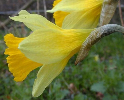

In [43]:
landscape_thumb.first()[1]

In [44]:
landscape_thumb.first()

('image_0064.jpg',
 <PIL.Image.Image image mode=RGB size=124x100 at 0x7F828D461908>)

In [47]:
! mkdir thumbnails

In [48]:
thumbnail_path = os.getcwd() + '/thumbnails/'

In [51]:
thumbnail_path

'/home/user10/DHSI-BigData/Day_2/thumbnails/'

In [54]:
! ls thumbnails | wc -l

794


In [52]:
landscape_thumb.foreach(lambda pair: pair[1].save(thumbnail_path + pair[0]))

### 8. End the application

In [55]:
sc.stop()

## Recap

In this notebook, we put in practice and learned about the following parts of 
**[Python Spark API](http://spark.apache.org/docs/latest/api/python/)**:
1. Import Spark Python module: 
**[`import pyspark`](http://spark.apache.org/docs/latest/api/python/pyspark.html)**
2. Create a SparkContext:
**[`pyspark.SparkContext()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext)**
2. Create a RDD from a list of objects:
**[`SparkContext.parallelize(list)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext.textFile)**
3. Count the number of elements in a RDD: 
**[`Rdd.count()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.count)**
4. Retrieve the first element of a RDD: 
**[`RDD.first()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.first)**
5. Apply a transformation on each element of a RDD:
**[`RDD.map(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.map)**
5. Filter a RDD:
**[`RDD.filter(func)`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.filter)**
7. Apply a function to all elements of a RDD: 
**[`RDD.foreach()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.RDD.foreach)**
10. End the SparkContext:
**[`SparkContext.stop()`](http://spark.apache.org/docs/latest/api/python/pyspark.html#pyspark.SparkContext.stop)**